## Python statistics essential training - 04_07_solution

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


array([[<AxesSubplot:title={'center':'grade'}>]], dtype=object)

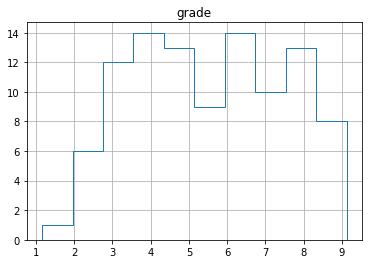

In [9]:
pop.hist(histtype = 'step')

In [46]:
sample_frac = np.mean(pop.grade>5)
sample_frac

0.57

In [67]:
def sample(size):
    frac = scipy.stats.percentileofscore(pop.grade.sample(size,replace = True))
    return frac

In [68]:
sample(100)

0.39

In [75]:
def bootstrap(times,size):
    bootstrap_sam = pd.DataFrame({'frac' :[sample(size) for i in range(times)]})
    return bootstrap_sam



In [76]:
bootstrap_sam = bootstrap(100,10000)

In [77]:
bootstrap_sam.head()

,frac
0,0.4268
1,0.4247
2,0.4335
3,0.4278
4,0.4285


In [78]:
sample_frac

0.57

array([[<AxesSubplot:title={'center':'frac'}>]], dtype=object)

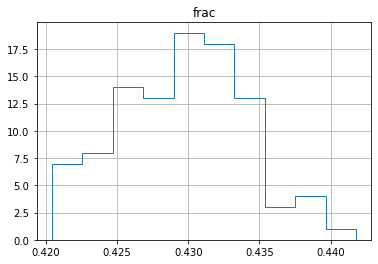

In [79]:
bootstrap_sam.hist(histtype = 'step')


In [83]:
1- bootstrap_sam.quantile(0.025), 1- bootstrap_sam.quantile(0.95)

(frac    0.578915
 Name: 0.025, dtype: float64,
 frac    0.56257
 Name: 0.95, dtype: float64)